# 5 Lasso回归与岭回归
  $lasso$回归(Least absolute shrinkage and selection operator)与岭回归主要用于解决线性回归中的过拟合问题，它们通过构造一个惩罚函数，可以将解释变量系数进行压缩并使某些系数为0，从而确定进入线性回归模型的解释变量或确定解释变量的解释力度，其中$lasso$回归具有稀疏化变量的作用，而岭回归不具备。
## 5.1 过拟合与正则化
### 5.1.1 过拟合
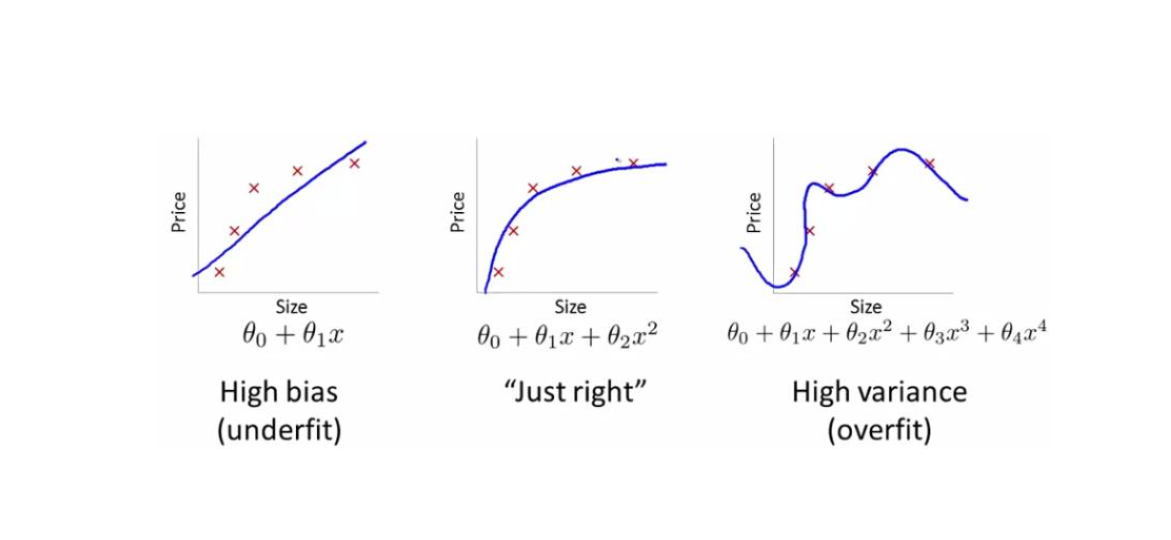
优点：拟合效果很好，残差平方和接近于0

缺点：拟合出的线性模型解释变量过多，无法泛化于新的样本中

### 5.1.2 正则化
  “正则化(Regularization)就是对最小化经验误差函数上加约束，这样的约束可以解释为先验知识(正则化参数等价于对参数引入先验分布)。约束有引导作用，在优化误差函数的时候倾向于选择满足约束的梯度减少的方向，使最终的解倾向于符合先验知识，表示原问题更可能是比较简单的，这样的优化倾向于产生参数值量级小的解，一般对应于稀疏参数的平滑解。”——百度百科

  即：正则化是一种解决过拟合问题的途径，正则化可以保留所有解释变量而减少部分变量的系数，或者仅保留具有解释效应的变量。

"overfit" → "just right": 去掉$\theta_3$和$\theta_4$或者将两者调至足够小。

## 5.2 代数表达
### 5.2.1 惩罚方法
   普通线性模型为：
   $$Y = X\beta + \epsilon$$
   
   其中，被解释变量样本为：$$Y = (y_1, y_2, y_3,...,y_n)^T$$
   
   解释变量样本为：$$X = (X_1, X_2, X_3,...,X_m)$$
   
   且对每个X_i有：$$X_i = (x_{i1}, x_{i2}, x_{i3},...,x_{in})^T$$
   
   随机误差项满足：$$\epsilon_j ～ N(0, \sigma^2) (j = 1,2,3,...,n)$$
   
   需要求出的回归系数为：$$\beta = (\beta_1, \beta_2, ..., \beta_m)^T$$
   
   理想情况下，当X为列满秩矩阵时，回归系数可由公式得出：
   
   
   $$\hat\beta_{OLS} = argmin||Y - X\beta||^2 = (X^TX)^{-1}X^TY$$
   
   
   
   一般情况下，当X不为列满秩矩阵时，需在最小化残差平方和上加上约束(惩罚方法)，函数如下：
   
   
   
   $$\hat\beta = argmin(||Y - X\beta||^2 + P_\lambda(|\beta|))$$
   
      
   其中，惩罚项为：$$P_\lambda(|\beta|) = \lambda\sum_{i=1}^{m}{|\beta_i|^k}$$

### 5.2.2 Lasso回归
当惩罚项指数$k = 1$时，即为$Lasso$惩罚（$L_1$),系数估计为：$$\hat\beta_{Lasso} = argmin(||Y - X\beta||^2 + \lambda\sum_{i=1}^{m}{|\beta_i|})$$
等价于：$$\hat\beta_{Lasso} = argmin||Y - X\beta||^2 , s.t. \sum_{i=1}^{m}{|\beta_i|}\le t, t\ge 0$$

特例：$m = 2$：$$y = \beta_1x_1 + \beta_2x_2 + \epsilon$$


$$||Y - X\beta||^2 = a\beta_1^2 + b\beta_2^2 + c\beta_1 + d\beta_2 + e$$

约束条件：$$|\beta_1|+|\beta_2| \le t$$
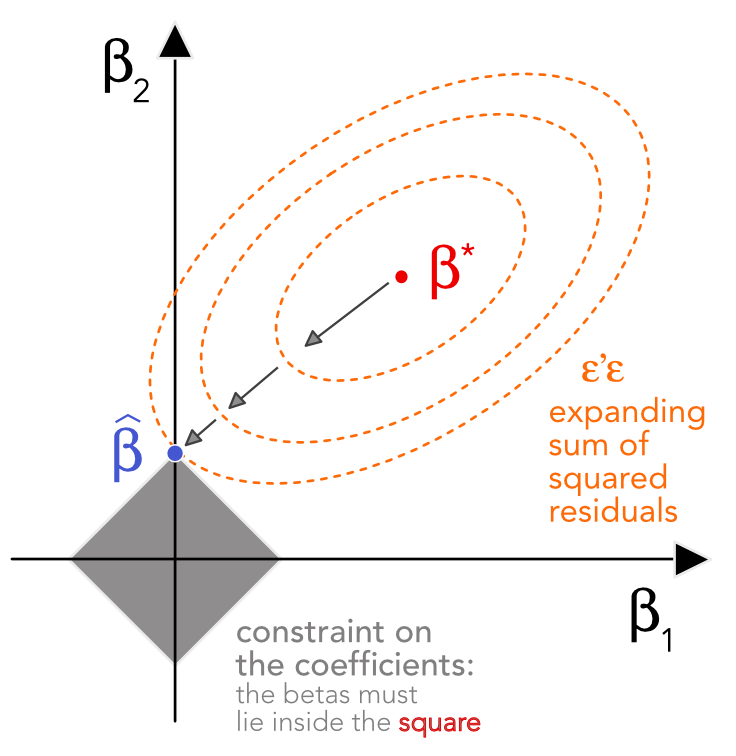

### 5.2.3 岭回归
当惩罚项指数$k = 2$时，即为$Ridge$惩罚（$L_2$),系数估计为：$$\hat\beta_{Ridge} = argmin(||Y - X\beta||^2 + \lambda\sum_{i=1}^{m}{|\beta_i|^2})$$
等价于：$$\hat\beta_{Ridge} = argmin||Y - X\beta||^2 , s.t. \sum_{i=1}^{m}{|\beta_i|^2}\le t, t\ge 0$$
特例：$m = 2$（同理5.2.2）：

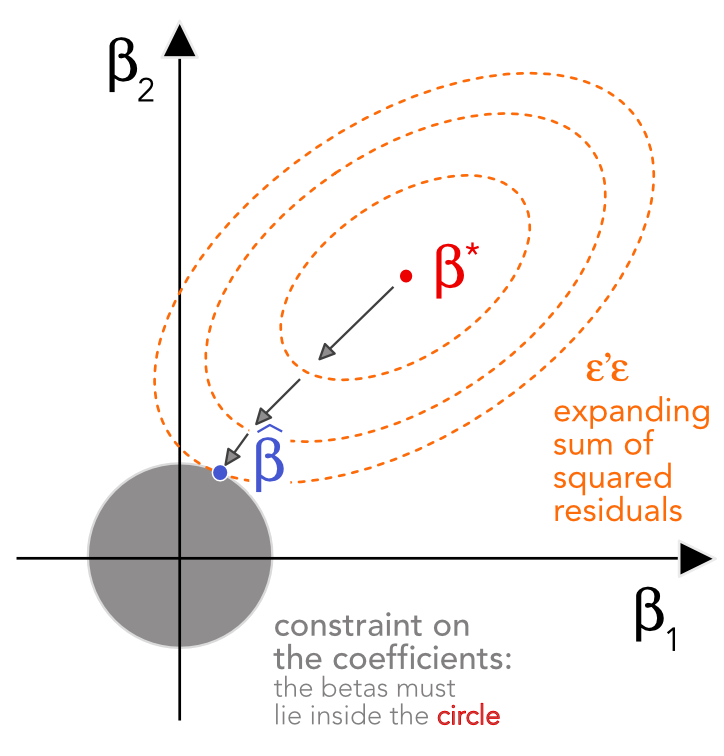

## 5.3代码实现

### 载入工具包

In [24]:
# 基本工具包
import pandas as pd
import numpy as np
import datetime
from calendar import monthrange
from dateutil.relativedelta import relativedelta

# 画图工具包
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['patch.facecolor'] = 'white' # This is helpful if you're using Colab in dark mode
plt.rcParams['figure.figsize'] = 15, 7
!pip install graphviz
import graphviz

# R数据读取工具包
!pip install pyreadr
import pyreadr

# 回归工具包
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import Lasso, Ridge


In [34]:
#读取数据
Rdata = pyreadr.read_r('C:/Users/29854/Desktop/data_ml.RData')
data = Rdata['data_ml']
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
# 确定所需要的变量名
features = data.columns.to_list()[2:-4] 
#原始数据显示
data.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


### Lasso回归模拟

In [60]:
#x表示解释变量，y表示被解释变量（1个月收益率），构造惩罚模型数据
y_penalized = data['R1M_Usd'].values
X_penalized = data[features].values
#选择超参数lambda（这里用alpha代替）并确定范围和等间距
alphas_l = np.arange(1e-3,2.5e-3,1e-4) 
print(alphas_l)

[0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019
 0.002  0.0021 0.0022 0.0023 0.0024]


In [62]:
#构建字典来装载超参数以及对应的系数结果
coef_path_l = {}
#进行Lasso回归,将回归所需结果放入字典
for alpha in alphas_l:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_penalized,y_penalized)
  coef_path_l[alpha] = lasso.coef_
len(coef_path_l)

15

In [51]:
#将字典转化为数据框
coef_path_l_df = pd.DataFrame.from_dict(coef_path_l).T
print(coef_path_l_df)

         0    1    2    3    4    5    6    7    8    9   ...   83   84   85  \
0.0010 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0011 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0012 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0013 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0014 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0015 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0016 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0   
0.0017 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0   
0.0018 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0   
0.0019 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0   
0.0020 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0   
0.0021 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.

<AxesSubplot:xlabel='Lambda', ylabel='beta'>

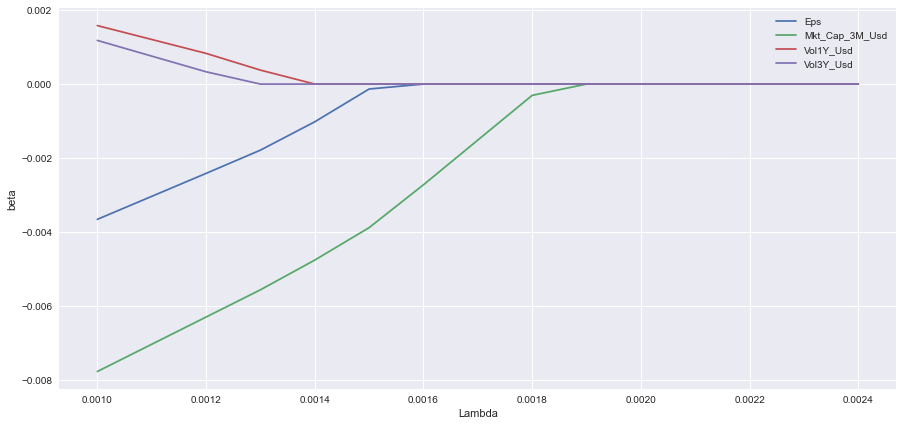

In [53]:
#给数据加入列名
coef_path_l_df.columns = features
#筛选出进入模型的解释变量（即系数不全为0）
relevant_predictors = (coef_path_l_df.abs().sum() != 0.0)
df_lasso = coef_path_l_df.loc[:,relevant_predictors]
df_lasso.plot(xlabel='Lambda',ylabel='beta')

上图为不同lambda值下的回归系数，很显然，被筛选入模型的解释变量为：Eps、Mkt_Cap_3M_Usd、Vol1Y_Usd、Vol3Y_Usd，且随着lambda值不断变大，解释变量系数向零缩减，且最终变为0

### 岭回归模拟

In [64]:
#选择超参数lambda（这里用alpha代替）并确定范围和等比例数量
alphas_r = np.logspace(-3,3,50)
print(alphas_r)
len(alphas_r)

[1.00000000e-03 1.32571137e-03 1.75751062e-03 2.32995181e-03
 3.08884360e-03 4.09491506e-03 5.42867544e-03 7.19685673e-03
 9.54095476e-03 1.26485522e-02 1.67683294e-02 2.22299648e-02
 2.94705170e-02 3.90693994e-02 5.17947468e-02 6.86648845e-02
 9.10298178e-02 1.20679264e-01 1.59985872e-01 2.12095089e-01
 2.81176870e-01 3.72759372e-01 4.94171336e-01 6.55128557e-01
 8.68511374e-01 1.15139540e+00 1.52641797e+00 2.02358965e+00
 2.68269580e+00 3.55648031e+00 4.71486636e+00 6.25055193e+00
 8.28642773e+00 1.09854114e+01 1.45634848e+01 1.93069773e+01
 2.55954792e+01 3.39322177e+01 4.49843267e+01 5.96362332e+01
 7.90604321e+01 1.04811313e+02 1.38949549e+02 1.84206997e+02
 2.44205309e+02 3.23745754e+02 4.29193426e+02 5.68986603e+02
 7.54312006e+02 1.00000000e+03]


50

In [65]:
#进行Lasso回归,将回归所需结果放入字典
coef_path_r = {}
for alpha in alphas_r:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_penalized,y_penalized)
  coef_path_r[alpha] = ridge.coef_

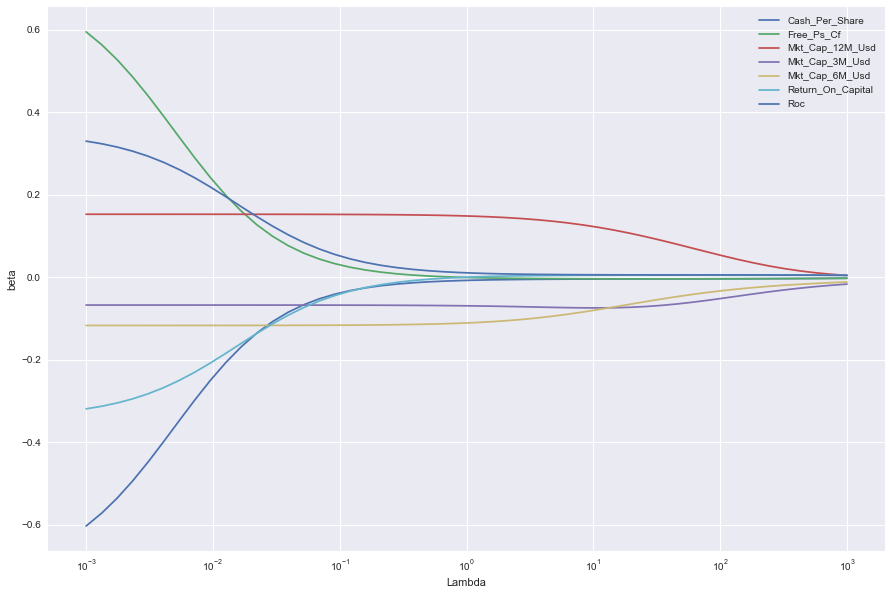

In [66]:
#将字典转化为数据框
coef_path_r_df = pd.DataFrame.from_dict(coef_path_r).T
coef_path_r_df.columns = features
#筛选数据回归系数之和大于3的解释变量，并画出图像
relevant_predictors = (coef_path_r_df.abs().sum() >= 3)
df_ridge = coef_path_r_df.loc[:,relevant_predictors]
df_ridge.plot(xlabel='Lambda',ylabel='beta',figsize=(15,10),legend=True, logx=True);

上图为不同lambda值下的回归系数，很显然，根据要求被筛选入模型的解释变量为：Cash_Per_Share、Free_Ps_Cf等，且随着lambda值不断变大，解释变量系数向零缩减。